In [1]:
# Load all packages
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import edges as e

In [2]:
# Create DataFrame
df = pd.read_excel("../Data/Rit.xlsx", sheet_name="rit_hb")
df.columns = ['Datum', 'UurgroepOmschrijving', 'VertrekHalteCode',
       'VertrekHalteNaam', 'VertrekXCoord', 'VertrekYCoord',
       'AankomstHalteCode', 'AankomstHalteNaam', 'AankomstXCoord',
       'AankomstYCoord', 'AantalRitten']

In [3]:
# Filter DataFrame
# Do not include "Overig" or trips through a stations 
df = df[(df["VertrekHalteNaam"] != "Overig") & (df["AankomstHalteNaam"] != "Overig")]
df = df[df["VertrekHalteNaam"] != df["AankomstHalteNaam"]]

# Remove NaN values
df = df.dropna()

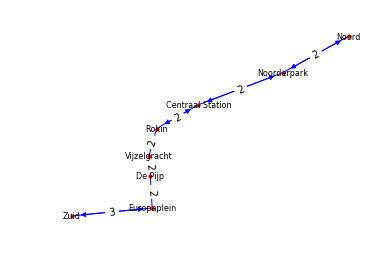

In [34]:
# Create graph
G=nx.MultiDiGraph()

# Lijn 52
G.add_edges_from([("Noord","Noorderpark",{"length":2}), ("Noorderpark", "Noord",{"length":2}),
                  ("Noorderpark","Centraal Station",{"length":2}), ("Centraal Station", "Noorderpark",{"length":2}),
                  ("Centraal Station","Rokin",{"length":2}), ("Rokin", "Centraal Station",{"length":2}),
                  ("Rokin","Vijzelgracht",{"length":2}), ("Vijzelgracht", "Rokin",{"length":2}),
                  ("Vijzelgracht","De Pijp",{"length":2}), ("De Pijp", "Vijzelgracht",{"length":2}),
                  ("De Pijp","Europaplein",{"length":2}), ("Europaplein", "De Pijp",{"length":2}),
                  ("Europaplein","Zuid",{"length":3}), ("Zuid", "Europaplein",{"length":3})], line='LIJN52')

LIJN52 = [(u, v) for (u, v, d) in G.edges(data=True) if d['line'] == 'LIJN52']

# Stations with X + Y coordinates from line 52
pos = {"Noord": (493123182.0,5.240117e+09), "Noorderpark": (491789115.0,5.238856e+09), 
       "Centraal Station": (490078150.0, 5.237749e+09), "Rokin": (489229651.0,5.236928e+09),
       "Vijzelgracht": (489072870.0,5.235980e+09), "De Pijp": (489101069.0,5.235296e+09), 
       "Europaplein": (489138430.0,5.234185e+09), "Zuid": (487509853.0,5.233908e+09)}

nx.draw_networkx_nodes(G, pos, node_size=10)

# Edges
nx.draw_networkx_edges(G, pos, edgelist=LIJN52, edge_color='blue')

# Labels
nx.draw_networkx_labels(G, pos, font_size=8)

edge_labels = dict([((u, v), d['length']) for u, v, d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display
plt.axis('off')
plt.show()